In [41]:
import pandas as pd
df=pd.read_csv(r"/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [42]:
df.shape

(101, 18)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [44]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

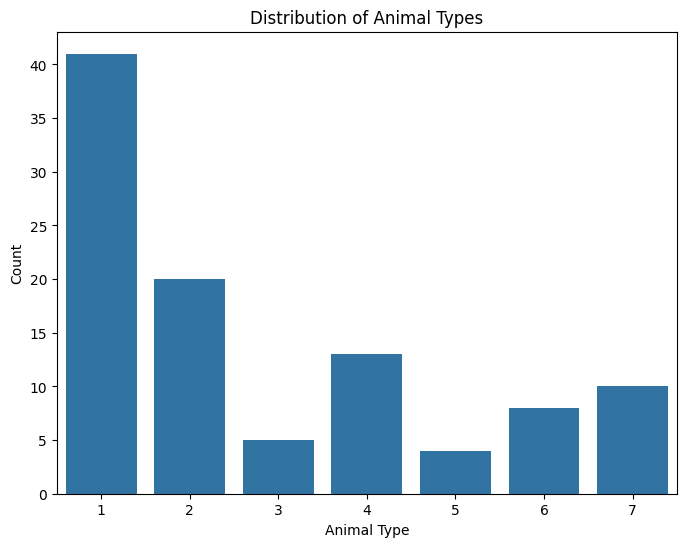

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

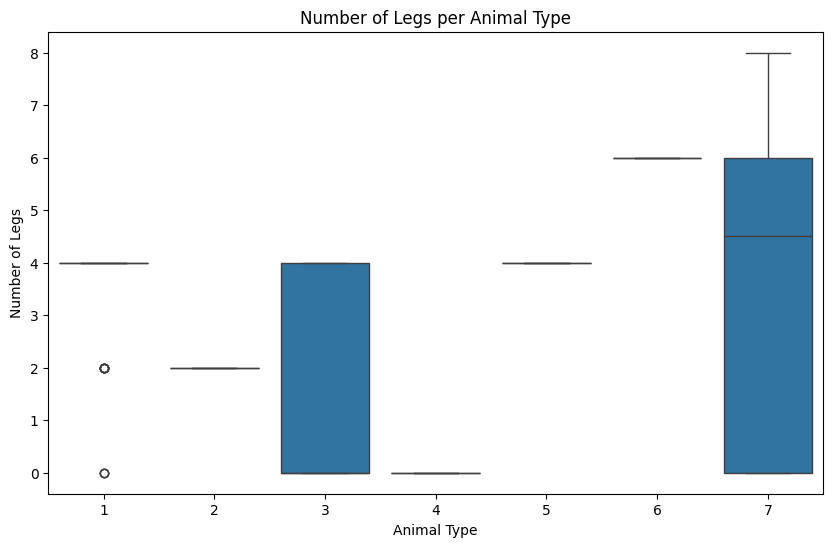

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='legs', data=df)
plt.title('Number of Legs per Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Number of Legs')
plt.show()

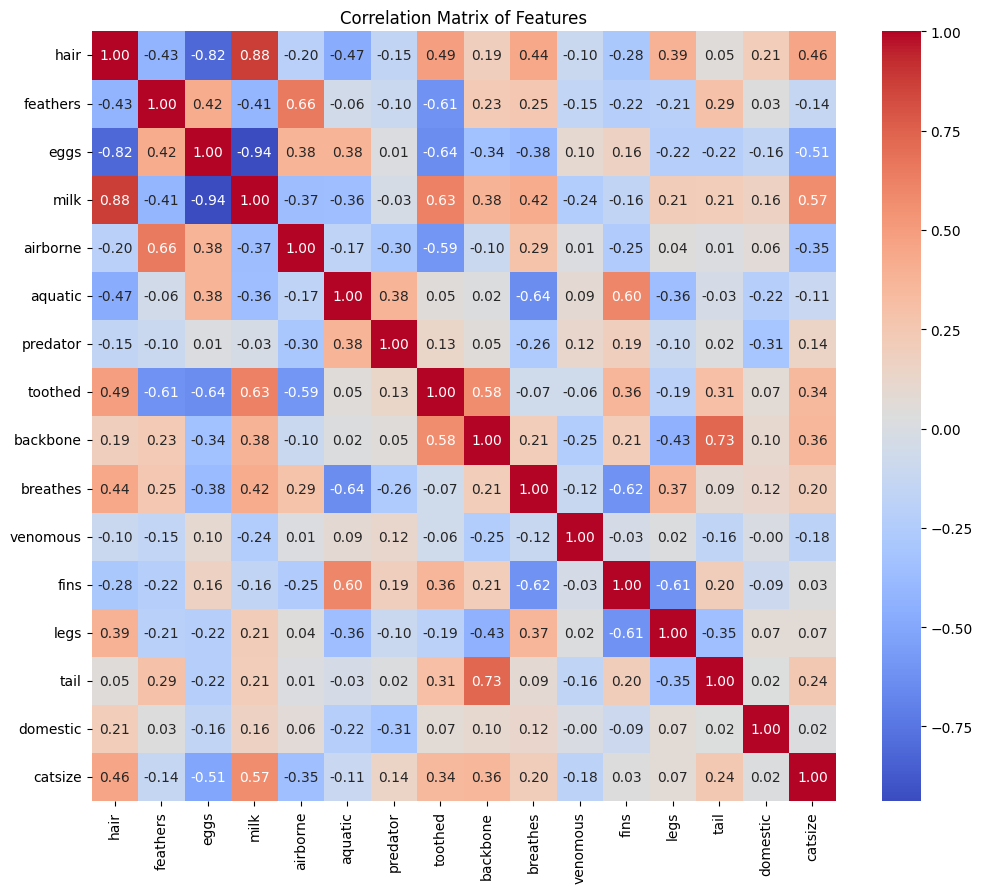

In [47]:
numeric_df = df.drop(columns=['animal name', 'type'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [48]:
X = df.drop(columns=['animal name', 'type'])
y = df['type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

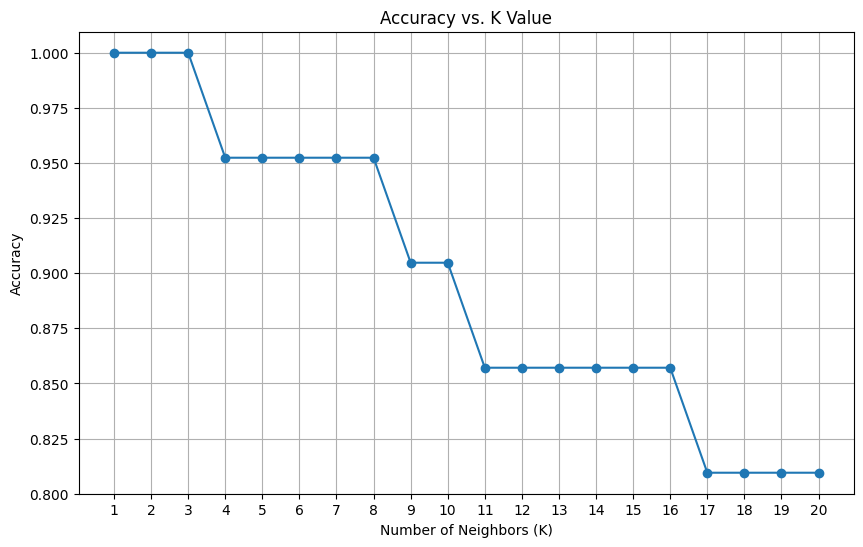

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [52]:
best_k = k_values[np.argmax(accuracies)]
print(f"The best K value is: {best_k}")

The best K value is: 1


In [53]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
y_pred = best_knn.predict(X_test)

In [55]:
X_2d = df[['legs', 'toothed']]
y_2d = df['type']
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, y_2d, test_size=0.2, random_state=42)

In [56]:
best_knn_2d = KNeighborsClassifier(n_neighbors=best_k)
best_knn_2d.fit(X_train_2d, y_train_2d)
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
Z = best_knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

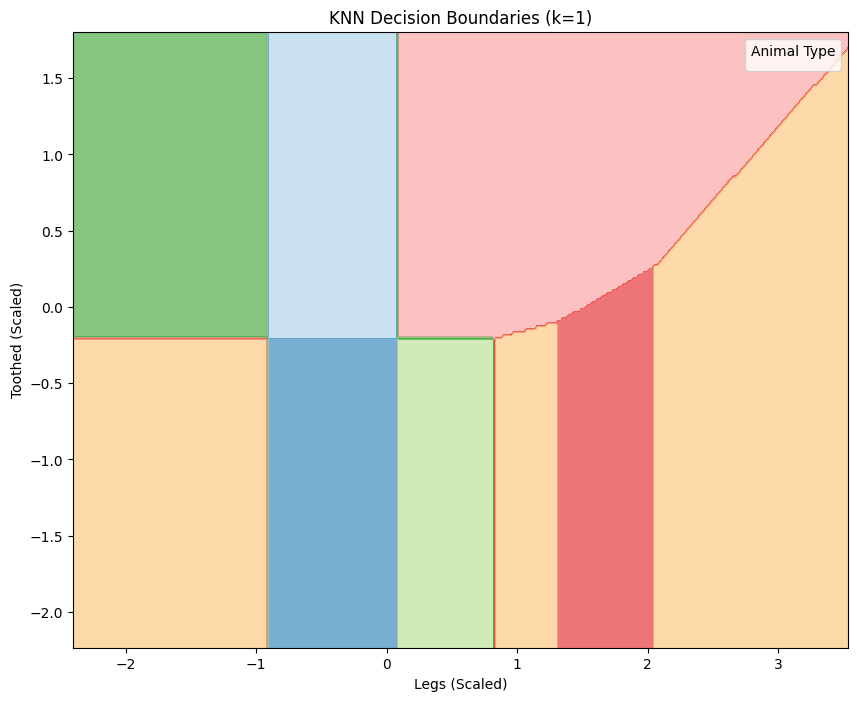

In [57]:
cmap_light = ListedColormap(sns.color_palette("Paired", len(np.unique(y_2d))))
cmap_bold = ListedColormap(sns.color_palette("dark", len(np.unique(y_2d))))
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (k={best_k})")
plt.xlabel("Legs (Scaled)")
plt.ylabel("Toothed (Scaled)")
plt.legend(title='Animal Type')
plt.show()

In [57]:
#1.What are the key hyperparameters in KNN?
#The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:
#Number of Neighbors (k): This is the most important hyperparameter. It determines the number of nearest data points considered when making a prediction. A small value of
#k makes the model sensitive to noise and can lead to overfitting, while a large value can smooth the decision boundaries and might lead to underfitting.
#Distance Metric: This defines how the "distance" between data points is calculated. Common metrics include:
#Euclidean Distance: The most common choice, representing the straight-line distance between two points. It's suitable for most general purposes.
#Manhattan Distance: Also known as "city block" distance, it's the sum of the absolute differences between the coordinates. It's useful in cases where the grid-like path is more relevant.
#Minkowski Distance: A generalized form of both Euclidean and Manhattan distances, where a parameter p can be adjusted. If
#p=1, it becomes Manhattan distance, and if p=2, it becomes Euclidean distance.

#2. What distance metrics can be used in KNN?
#As mentioned above, several distance metrics can be used in KNN:
#Euclidean Distance: This is the standard straight-line distance and is often the default choice. It's calculated using the formula:
#Manhattan Distance: This metric is useful when the dataset has a high number of dimensions or when the data features are not physically correlated. It's calculated as the sum of the absolute differences:
#Minkowski Distance: This is a more generalized metric that can be adjusted to act as either Euclidean or Manhattan distance. Its formula is:
#Hamming Distance: This is a specialized metric used for categorical or binary data. It measures the number of positions at which the corresponding symbols are different between two strings of equal length.